In [1]:
import numpy
import math
import cv2
from PIL import Image
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy.linalg import inv 

In [2]:
def FLDA(X,Y):
    f = X.shape[1]  #data dimension
    C0 = numpy.array([X[i] for i in range(X.shape[0]) if Y[i] == 0])   #separating class 0
    C1 = numpy.array([X[i] for i in range(X.shape[0]) if Y[i] == 1])   #separating class 1
    M0 = numpy.sum(C0,axis = 0)/C0.shape[0]                            #mean of Class 0
    M1 = numpy.sum(C1,axis = 0)/C1.shape[0]                            #mean of class 1
    M0 = numpy.reshape(M0,(f,1))                                        
    M1 = numpy.reshape(M1,(f,1))
    C0 = numpy.reshape(C0,(C0.shape[0],C0.shape[1],1))                 
    C1 = numpy.reshape(C1,(C1.shape[0],C1.shape[1],1))
    SW0 = numpy.sum(numpy.array([(C0[i]-M0)@(C0[i]-M0).T for i in range(C0.shape[0])]), axis = 0)
    SW1 = numpy.sum(numpy.array([(C1[i]-M1)@(C1[i]-M1).T for i in range(C1.shape[0])]), axis = 0)
    SW = SW0 + SW1
    W = inv(SW)@(M1-M0)
    
    b = -(W.T@(M1+M0) + (W.T@W)*W.T@(SW0@W - SW1@W))/2
    return W.reshape(X.shape[1]),b[0][0]

In [3]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
images, Y = load_mnist('../fMNIST', kind='train')
images_test, Y_test = load_mnist('../fMNIST', kind='t10k') 

In [5]:
print (images.shape)
print (Y)
classes = [0,1,2,3,4,5,6,7,8,9]

(60000, 784)
[9 0 0 ... 3 0 5]


In [23]:
def PCA(images,dimensionToProject):
    # calculate the mean of each column
    M = mean(numpy.array(images).T.tolist(), axis=1)
    # center columns by subtracting column means

    C = images - M
    # calculate covariance matrix of centered matrix
    V = cov(C.T)
    # eigendecomposition of covariance matrix
    values, vectors = eig(V)
    vectors = vectors[:numpy.shape(vectors)[0],0:dimensionToProject]
    # project data
    P = (vectors.T.dot(C.T)).T
    
    return (numpy.real(P))

In [7]:
def multiclassFLDA(X,Y,classes):
    f = X.shape[1]
    n = X.shape[0]
    c = len(classes)
    W = numpy.zeros((c,f))
    b = numpy.zeros((c))
    for i in range(c):
        Ty = numpy.zeros((n))
        for j in range(n):
            if Y[j] == classes[i]:
                Ty[j] = 1
            else:
                Ty[j] = 0
        W[i],b[i] = FLDA(X,Ty)
        
    return W,b

In [18]:
def accuracy(X,Y,W,b,classes):
    c = len(classes)         #number of classes
    n = X.shape[0]           #number of data samples
    f = W.shape[1]           #input dimension
    acc = 0                  #number of correctly classified inputs
    
    # implementing soft-max to calculate predicted class
    g = numpy.zeros(c)     # probability for each class
    for i in range(n):
        g = numpy.exp(((W@X[i].reshape(f,1)).reshape(c)+b))
        y_predicted = numpy.where(g == max(g))[0]
        if (y_predicted[0] == classes.index(Y[i])):
            acc += 1
        
    
    return acc/X.shape[0]

In [26]:
acc = []
l = 0
for i in range(20,200,5):
    print (i)
    X = PCA(images,i)
    W,b = multiclassFLDA(X,Y,classes)
    acc.append(accuracy(X,Y,W,b,classes)*100)
    print ("accuracy : ",acc[l])
    l += 1

20
accuracy :  74.795
25
accuracy :  75.91666666666667
30
accuracy :  77.12166666666667
35
accuracy :  77.85166666666666
40
accuracy :  78.02166666666666
45
accuracy :  78.50833333333334
50
accuracy :  78.77833333333332
55
accuracy :  79.02833333333334
60
accuracy :  79.11500000000001
65
accuracy :  79.38833333333334
70
accuracy :  79.42833333333333
75
accuracy :  79.51333333333334
80
accuracy :  79.76333333333334
85
accuracy :  79.88333333333333
90
accuracy :  80.14833333333333
95
accuracy :  80.17999999999999
100


KeyboardInterrupt: 

In [27]:
print (acc)

[74.795, 75.91666666666667, 77.12166666666667, 77.85166666666666, 78.02166666666666, 78.50833333333334, 78.77833333333332, 79.02833333333334, 79.11500000000001, 79.38833333333334, 79.42833333333333, 79.51333333333334, 79.76333333333334, 79.88333333333333, 80.14833333333333, 80.17999999999999]


In [28]:
acc1 = []
l = 0
for i in range(20):
    print (i)
    X = PCA(images,i)
    W,b = multiclassFLDA(X,Y,classes)
    acc1.append(accuracy(X,Y,W,b,classes)*100)
    print ("accuracy : ",acc1[l])
    l += 1

0
accuracy :  10.0
1
accuracy :  24.991666666666667
2
accuracy :  45.12
3
accuracy :  50.708333333333336
4
accuracy :  54.7
5
accuracy :  60.14000000000001
6
accuracy :  61.69833333333333
7
accuracy :  62.19
8
accuracy :  65.23333333333333
9
accuracy :  68.03833333333333
10
accuracy :  68.525
11
accuracy :  69.42166666666667
12
accuracy :  69.88
13
accuracy :  70.765
14
accuracy :  71.32833333333333
15
accuracy :  72.58333333333333
16
accuracy :  73.22
17
accuracy :  73.63333333333333
18
accuracy :  74.25833333333334
19
accuracy :  74.60333333333334


In [29]:
print (acc1)

[10.0, 24.991666666666667, 45.12, 50.708333333333336, 54.7, 60.14000000000001, 61.69833333333333, 62.19, 65.23333333333333, 68.03833333333333, 68.525, 69.42166666666667, 69.88, 70.765, 71.32833333333333, 72.58333333333333, 73.22, 73.63333333333333, 74.25833333333334, 74.60333333333334]


In [31]:
acc2 = acc
print (acc2)

[74.795, 75.91666666666667, 77.12166666666667, 77.85166666666666, 78.02166666666666, 78.50833333333334, 78.77833333333332, 79.02833333333334, 79.11500000000001, 79.38833333333334, 79.42833333333333, 79.51333333333334, 79.76333333333334, 79.88333333333333, 80.14833333333333, 80.17999999999999]


In [32]:
acc = acc1 + acc2
print (acc)

[10.0, 24.991666666666667, 45.12, 50.708333333333336, 54.7, 60.14000000000001, 61.69833333333333, 62.19, 65.23333333333333, 68.03833333333333, 68.525, 69.42166666666667, 69.88, 70.765, 71.32833333333333, 72.58333333333333, 73.22, 73.63333333333333, 74.25833333333334, 74.60333333333334, 74.795, 75.91666666666667, 77.12166666666667, 77.85166666666666, 78.02166666666666, 78.50833333333334, 78.77833333333332, 79.02833333333334, 79.11500000000001, 79.38833333333334, 79.42833333333333, 79.51333333333334, 79.76333333333334, 79.88333333333333, 80.14833333333333, 80.17999999999999]


In [38]:
x1 = list(range(20))
x2 = list(range(20,100,5))
x = x1+x2
print (x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


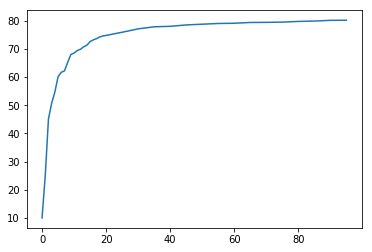

In [39]:
import matplotlib.pyplot as plt
plt.figure('fMNIST_FLDA_accuracy')
plt.plot(x,acc)
plt.savefig('fMNIST_FLDA_accuracy')

In [37]:
acc_test = accuracy(X_test,Y_test,W,b,classes)
print (acc_test*100)

21.790000000000003


In [38]:
# code may be improved

In [ ]:
from mnist import MNIST
images = mnist.train_images()
Y = mnist.train_labels().astype('float')

images_test = mnist.test_images()
Y_test = mnist.test_labels().astype('float')
img = Image.fromarray(images_test[2],'L')
images = images.reshape(images.shape[0],images.shape[1]*images.shape[2])
images_test = images_test.reshape(images_test.shape[0],images_test.shape[1]*images_test.shape[2])
